<a href="https://colab.research.google.com/github/feer-rodriguess90/WiDS_Challenge2/blob/main/WIDS_2024_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import the Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import feature_column

# Adjust the granularity of reporting
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format


Step 2: Import Data and Perform Initial Analysis


In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # Shuffle the training set
display(train_df.head(5))

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
7128,849898,White,COMMERCIAL,CA,931,West,Pacific,71,F,NaN,...,62.0,62.0,65.3,73.1,72.3,69.5,66.6,62.6,56.3,275.0
9079,255804,Black,NaN,SC,291,South,South Atlantic,41,F,NaN,...,59.3,73.3,80.1,80.1,79.7,79.1,66.1,50.9,47.7,205.0
5444,791748,NaN,MEDICAID,FL,331,South,South Atlantic,84,F,24.5,...,76.5,78.8,82.7,83.7,83.8,83.2,81.5,76.3,71.0,35.0
10746,546029,NaN,NaN,CA,945,West,Pacific,58,F,NaN,...,57.0,59.8,67.9,73.2,69.7,67.9,64.0,56.8,49.1,95.0
790,880191,White,COMMERCIAL,MI,494,Midwest,East North Central,58,F,NaN,...,36.9,62.6,67.3,71.2,71.1,65.0,49.4,33.5,31.2,267.0


In [ ]:
# Print the size of the data set

print("Numbers of rows and columns in training set: ", train_df.shape)
print("Numbers of rows and columns in testing set: ", test_df.shape)

Numbers of rows and columns in training set:  (12204, 152)
Numbers of rows and columns in testing set:  (5646, 151)


In [ ]:
# Print column name and type of the training set

print(train_df.info())
print(train_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 12204 entries, 7128 to 7503
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(138), int64(3), object(11)
memory usage: 14.2+ MB
None
patient_id                       int64
patient_race                    object
payer_type                      object
patient_state                   object
patient_zip3                     int64
                                ...   
Average of Sep-18              float64
Average of Oct-18              float64
Average of Nov-18              float64
Average of Dec-18              float64
metastatic_diagnosis_period    float64
Length: 152, dtype: object


In [ ]:
# Print out different data types

# Categorical columns
cat_col = [col for col in train_df.columns if train_df[col].dtype == 'object']
print('Categotical columns: ', cat_col)

# Numerical columns
num_col = [col for col in train_df.columns if train_df[col].dtype != 'object']
print('Numerical columns: ', num_col)

Categotical columns:  ['patient_race', 'payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']
Numerical columns:  ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'inc

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Bar(y=train_df["patient_race"].value_counts(), x=["Asian", "African American", "Hispanic or Latino", "White", "Other Race"], name="Race"), row=1, col=1)
fig.add_trace(go.Bar(y=train_df["payer_type"].value_counts(), x=["Medicaid", "Commercial", "Medicare"], name="Payer Type"), row=1, col=2)



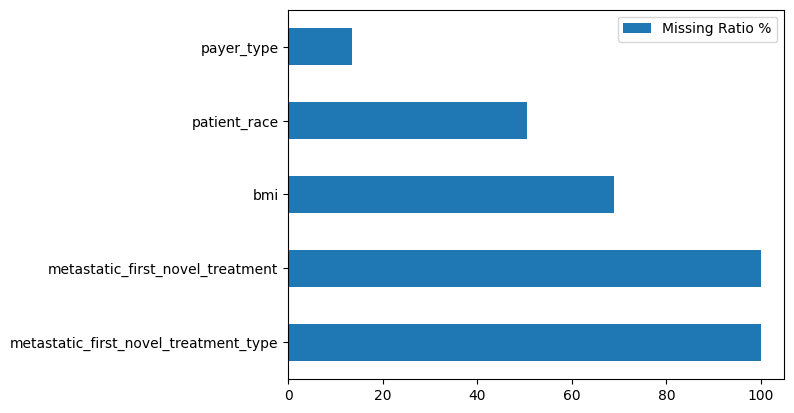

In [ ]:
# Plot the columns that have the most missing values
def plot_nas(df: pd.DataFrame):
  if df.isnull().sum().sum() != 0:
    na_df = (df.isnull().sum() / len(df)) * 100
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %': na_df})
    missing_data_more_than_20_percent = missing_data[missing_data['Missing Ratio %'] > 10.0]
    missing_data_more_than_20_percent.plot(kind = "barh")
    plt.show()
  else:
    print('No NAs found')

plot_nas(train_df)

* High number of null values. What draws the most attention is 'bmi' which contains 69% of null data.


<Axes: xlabel='payer_type'>

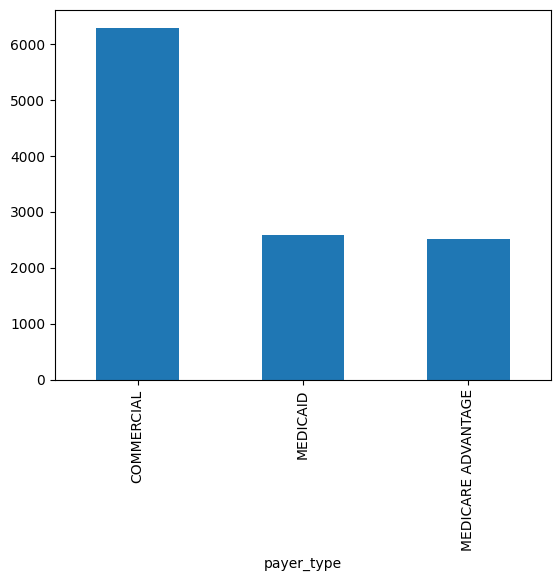

In [ ]:
# Plot Categotical Columns

train_df['payer_type'].value_counts().plot(kind='bar')

In [ ]:
# Print statistical summary of numerical columns

train_df['bmi'].describe()

count   4102.0
mean      29.2
std        5.8
min       15.0
25%       24.8
50%       28.6
75%       33.0
max       97.0
Name: bmi, dtype: float64

Text(0.5, 1.0, 'Correlation Between BMI and Race')

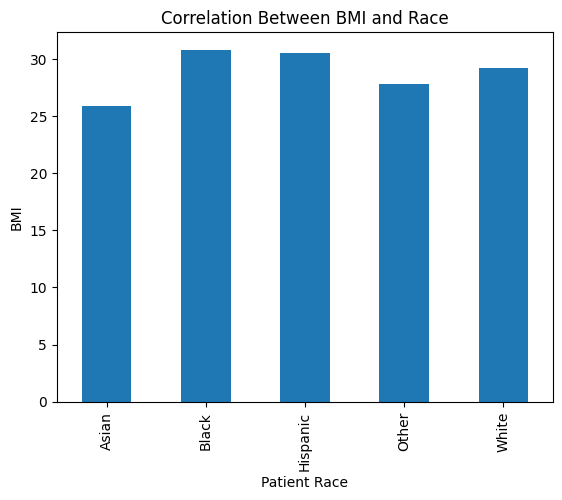

In [ ]:
# Plot correlation between categorical values vs. numerical values

train_df.groupby(['patient_race'])["bmi"].mean().plot(kind='bar')
plt.xlabel('Patient Race')
plt.ylabel('BMI')
plt.title('Correlation Between BMI and Race')


<Axes: xlabel='patient_race'>

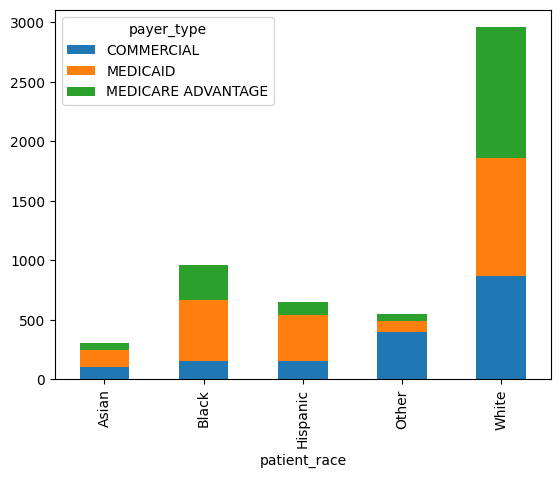

In [ ]:
# Plot correlation between categorical values vs. categorical values

pd.crosstab(train_df['patient_race'], train_df['payer_type']).plot(kind="bar",stacked=True)

Step 3: Fundamental Data Cleaning Steps

Handle missing values


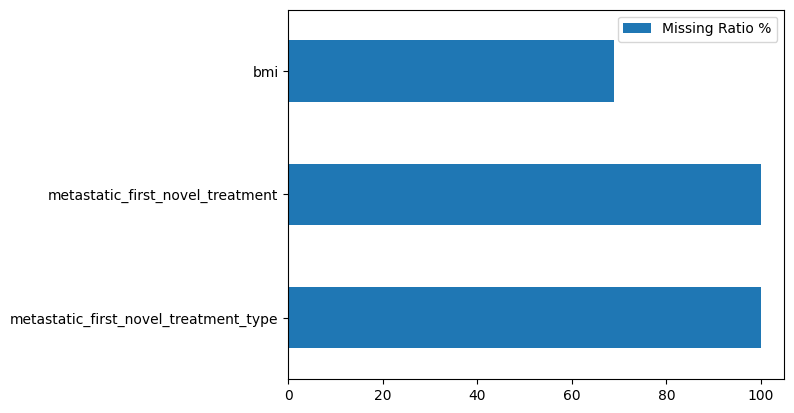

In [ ]:
# Fill in empty value in the "patient_race" column with "N/A"
train_df["patient_race"].fillna("N/A", inplace=True)

# Fill in empty value in the "payer_type" column with "N/A"
train_df["payer_type"].fillna("N/A", inplace=True)

# Patient race and Payer type are not show anymore because already handle the missing value
plot_nas(train_df)

<Axes: ylabel='bmi'>

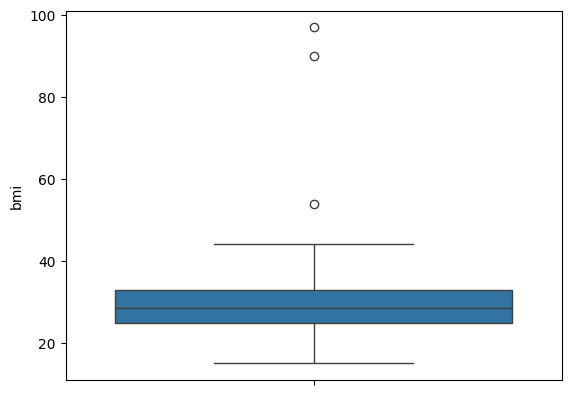

In [ ]:
# Filter out data outliers

# Plot the BMI value to detect outliners
sns.boxplot(train_df['bmi'])

# outliner_train_df = train_df[train_df['bmi] > 70]
# display(outliner_train_df)

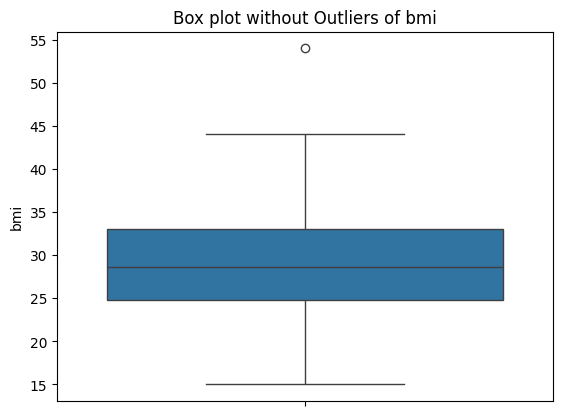

In [ ]:
def removal_box_plot(df, column, threshold):
  removed_outliers = df[df[column] <= threshold]

  sns.boxplot(removed_outliers[column])
  plt.title(f'Box plot without Outliers of {column}')
  plt.show()
  return removed_outliers

threshold_value = 70
no_outilers = removal_box_plot(train_df, 'bmi', threshold_value)

Step 4: Data Transformation Techniques


In [ ]:
# Label Encoding
le1 = preprocessing.LabelEncoder()
train_df['payer_type_label_encode'] = le1.fit_transform(train_df['payer_type'])
display(train_df)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_label_encode
860,548800,N/A,COMMERCIAL,IN,462,Midwest,East North Central,37,F,NaN,...,71.4,74.5,75.5,75.0,70.1,55.2,36.8,35.6,191,0
4827,124849,N/A,COMMERCIAL,TX,786,South,West South Central,41,F,NaN,...,78.1,84.4,85.8,85.6,78.2,67.9,54.1,50.6,244,0
2675,756064,N/A,COMMERCIAL,OK,730,South,West South Central,54,F,NaN,...,75.0,80.2,82.7,80.4,73.4,60.2,45.3,40.6,262,0
7550,294649,N/A,MEDICAID,NY,104,Northeast,Middle Atlantic,60,F,NaN,...,64.2,69.4,76.4,76.8,68.9,54.8,41.1,36.5,30,1
4240,240535,N/A,MEDICAID,IL,606,Midwest,East North Central,60,F,NaN,...,67.4,72.4,76.7,77.2,69.9,53.3,35.2,34.2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,367171,N/A,COMMERCIAL,CA,922,West,Pacific,49,F,39.0,...,74.5,83.6,91.0,89.8,85.1,70.7,60.6,53.0,102,0
5652,711064,White,MEDICAID,NM,875,West,Mountain,59,F,NaN,...,58.8,68.0,69.0,66.5,61.2,48.1,34.6,28.6,67,1
4447,604086,N/A,N/A,CA,928,West,Pacific,31,F,NaN,...,66.0,70.9,80.7,79.8,75.3,71.4,66.0,59.2,279,3
1681,122215,Black,MEDICAID,TX,761,South,West South Central,63,F,NaN,...,77.4,84.3,87.6,83.7,76.2,64.7,51.7,47.3,78,1


In [ ]:
# One-hot Encoding - Generate 4 different columns based on what categories
# Get the categorical values
one_hot_enconder = LabelBinarizer()
one_hot_enconder.fit(train_df['payer_type'])
print(one_hot_enconder.classes_)

# Transform our payer_type column to 4 different binary columns corresponding to different categories
transformed = pd.DataFrame(one_hot_enconder.transform(train_df['payer_type']),columns=one_hot_enconder.classes_)
# Combine with original data frame
train_df  = pd.concat([train_df, transformed], axis=1)
display(train_df)

['COMMERCIAL' 'MEDICAID' 'MEDICARE ADVANTAGE' 'N/A']


,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_label_encode,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,N/A
860,548800,N/A,COMMERCIAL,IN,462,Midwest,East North Central,37,F,NaN,...,70.1,55.2,36.8,35.6,191,0,0,0,1,0
4827,124849,N/A,COMMERCIAL,TX,786,South,West South Central,41,F,NaN,...,78.2,67.9,54.1,50.6,244,0,0,1,0,0
2675,756064,N/A,COMMERCIAL,OK,730,South,West South Central,54,F,NaN,...,73.4,60.2,45.3,40.6,262,0,0,0,0,1
7550,294649,N/A,MEDICAID,NY,104,Northeast,Middle Atlantic,60,F,NaN,...,68.9,54.8,41.1,36.5,30,1,1,0,0,0
4240,240535,N/A,MEDICAID,IL,606,Midwest,East North Central,60,F,NaN,...,69.9,53.3,35.2,34.2,5,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,367171,N/A,COMMERCIAL,CA,922,West,Pacific,49,F,39.0,...,85.1,70.7,60.6,53.0,102,0,1,0,0,0
5652,711064,White,MEDICAID,NM,875,West,Mountain,59,F,NaN,...,61.2,48.1,34.6,28.6,67,1,0,1,0,0
4447,604086,N/A,N/A,CA,928,West,Pacific,31,F,NaN,...,75.3,71.4,66.0,59.2,279,3,0,1,0,0
1681,122215,Black,MEDICAID,TX,761,South,West South Central,63,F,NaN,...,76.2,64.7,51.7,47.3,78,1,1,0,0,0


In [ ]:
# Bucketized columns - Split its value into different categories based on numerical ranges
# Instead of representing age as a numeric column, we could split the age into several buckets

bins = [0,2,4,13,20,70,100]
labels = ['Infant','Toddler','Kid','Teen','Adult','Old Adult']
train_df['patient_age_group'] = pd.cut(train_df['patient_age'], bins=bins, labels=labels, right=False)
display (train_df)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_label_encode,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,N/A,patient_age_group
860,548800,N/A,COMMERCIAL,IN,462,Midwest,East North Central,37,F,NaN,...,55.2,36.8,35.6,191,0,0,0,1,0,Adult
4827,124849,N/A,COMMERCIAL,TX,786,South,West South Central,41,F,NaN,...,67.9,54.1,50.6,244,0,0,1,0,0,Adult
2675,756064,N/A,COMMERCIAL,OK,730,South,West South Central,54,F,NaN,...,60.2,45.3,40.6,262,0,0,0,0,1,Adult
7550,294649,N/A,MEDICAID,NY,104,Northeast,Middle Atlantic,60,F,NaN,...,54.8,41.1,36.5,30,1,1,0,0,0,Adult
4240,240535,N/A,MEDICAID,IL,606,Midwest,East North Central,60,F,NaN,...,53.3,35.2,34.2,5,1,0,0,1,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,367171,N/A,COMMERCIAL,CA,922,West,Pacific,49,F,39.0,...,70.7,60.6,53.0,102,0,1,0,0,0,Adult
5652,711064,White,MEDICAID,NM,875,West,Mountain,59,F,NaN,...,48.1,34.6,28.6,67,1,0,1,0,0,Adult
4447,604086,N/A,N/A,CA,928,West,Pacific,31,F,NaN,...,71.4,66.0,59.2,279,3,0,1,0,0,Adult
1681,122215,Black,MEDICAID,TX,761,South,West South Central,63,F,NaN,...,64.7,51.7,47.3,78,1,1,0,0,0,Adult


In [ ]:
# Scaling

display(train_df["home_value"])

860    175803.4
4827   270143.3
2675   148536.7
7550   422924.6
4240   312873.1
         ...   
3383   262980.9
5652   303961.6
4447   677688.5
1681   200021.2
6787   595619.6
Name: home_value, Length: 13173, dtype: float64

In [ ]:
# Min-Max Scaling (normalization)

def min_max_scaling(df, column_name):
  min_value = df[column_name].min()
  max_value = df[column_name].max()
  df[column_name] = (df[column_name] - min_value) / (max_value - min_value)

# Apply min-max scaling to 'Salary' column
min_max_scaling(train_df, 'home_value')

# Print the DataFrame after min-max scaling
print("DataFrame after Min-Max Scaling:")
display(train_df["home_value"])

DataFrame after Min-Max Scaling:


860    0.1
4827   0.1
2675   0.0
7550   0.2
4240   0.1
        ..
3383   0.1
5652   0.1
4447   0.3
1681   0.1
6787   0.3
Name: home_value, Length: 13173, dtype: float64